# Validation of the IRS method
The IRS method solves the challenge of combining data when multiple TMT experiments are necessary.

> Plubell, D.L., Wilmarth, P.A., Zhao, Y., Fenton, A.M., Minnier, J., Reddy, A.P., Klimek, J., Yang, X., David, L.L. and Pamir, N., 2017. Extended multiplexing of TMT labeling reveals age and high fat diet specific proteome changes in mouse epididymal adipose tissue. Molecular & Cellular Proteomics, pp.mcp-M116.

A robust validation was provided in the above manuscript's Supplemental materials by using half of the pooled standards for IRS and using the other half as a validation set. A recently completed experiment (BIND-473) had 60 samples. Eleven-plex TMT lables were used with duplicated pooled standard channels. That leaves 9 channels for biological samples per plex. Seven plexes would have 63 available channels. After the 60 biological samples, that leaves 3 additional channels. Extra pooled standard samples were labeled and analyzed in the three extra channels. Those 3 extra channels were distributed in three of the 7 TMT experiments.

This allows more validations to be checked. There are three TMT experiments with triplicate pooled standards run in the same TMT experiment. We also have the three independent extra pooled standards that can be compared before and after a proper IRS normalization based on duplicated pooled standards. Remember that the master pooled standard protein mixture is created from equal amounts of all 60 samples and each pooled standard channel is an independent digestion and labeling of an aliquot of the master pooled standard protein mixture.

The data are from human urine exosomes from thee biological conditions: controls, CRR (cirrhosis), and HCC (hepatocellular carcinoma) from the Christina Binder lab at OHSU. Exosome isolation performed at Ymir Genomics (Boston, MA) by Shannon Pendergrast. eFASP digestion, 11-plex TMT labeling, and SPS MS3 mass spec analysis performed at OHSU by Ashok Reddy. The IRS method was used to accommodate 20 samples per condition in 7 TMT experiments. 30-fraction online high pH RP/low pH RP separations were done. The SPS MS3 method was done on a Thermo Fusion with the standard method. 

Preliminary data analysis performed by Phil Wilmarth, OHSU. RAW files were converted to text files using MSConvert. Python scripts created MS2 spectra for database searching and tables of the reporter ion intensities (peak heights) for each MS3 scan. Comet database searches were performed using a canonical protein database (downloaded with software available at https://github.com/Delan-Huang/Reference_Proteome_Manager), tryptic cleavage, a wider tolerance search, static TMT label modifications, and variable oxidation of methionine. An extended version of the PAW pipeline was used for filtering PSM identifications by accurate masses and to 1% FDR using the target/decoy strategy. Parsimony and extended parsimony analyses were used to produce a final list of identified proteins and to determine which peptides were unique to the final protein groups. Total protein intensities were computed as the sums of all unique peptide reporter ion signals. IRS normalization of the TMT data across the 7 TMT experiments was done using Python scripts. The analysis presented here was performed with R. 

> Kessner, D., Chambers, M., Burke, R., Agus, D. and Mallick, P., 2008. ProteoWizard: open source software for rapid proteomics tools development. Bioinformatics, 24(21), pp.2534-2536.

> Eng, J.K., Jahan, T.A. and Hoopmann, M.R., 2013. Comet: an open‐source MS/MS sequence database search tool. Proteomics, 13(1), pp.22-24.

> Wilmarth, P.A., Riviere, M.A. and David, L.L., 2009. Techniques for accurate protein identification in shotgun proteomic studies of human, mouse, bovine, and chicken lenses. Journal of ocular biology, diseases, and informatics, 2(4), pp.223-234.

> Elias, J.E. and Gygi, S.P., 2007. Target-decoy search strategy for increased confidence in large-scale protein identifications by mass spectrometry. Nature methods, 4(3), p.207.

In [1]:
## BIND-473 Analysis of extra pooled channels
## 20180830 by Phil Wilmarth

# library imports
library(tidyverse)
library(DescTools)
library(psych)

# load the IRS-normalized data and check the table
data_import <- read_tsv("pooled_grouped_protein_summary_TMT_IRS_normalized.txt")

# get the non-contaminant proteins seen in all 7 plexes (2152 proteins)
# the prepped table from pandas is sorted so these are the upper rows
data_intersect <- filter(data_import, is.na(Filter), is.na(Missing))

# and collect the pooled channels before and after IRS
data_sl_pool <- data_intersect %>% 
  select(starts_with("SLNorm")) %>%
  select(contains("Pool"))
data_irs_pool <- data_intersect %>%
  select(starts_with("IRSNorm")) %>%
  select(contains("Pool"))
data_sl_extra <- data_intersect %>%
  select(starts_with("SLNorm")) %>%
  select(contains("Extra"))
data_irs_extra <- data_intersect %>%
  select(starts_with("IRSNorm")) %>%
  select(contains("Extra"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘dplyr’ was built under R version 3.5.1”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘psych’

The following objects are masked from ‘package:DescTools’:

    AUC, ICC, SD

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha

Parsed with column specification:
cols(
  .default = col_double(),
  ProtGroup = col_integer(),
  Counter = col_integer(),
  Accession = col_character(),
  Identical = col_character(),
  Similar = col_character(),
  OtherLoci = col_character(),
  Filter = col_character(),
  Missing = col_character(),
  Coverage = col_character(),
  SeqLength = col_character(),
  MW = 

## See what the pooled channels look like
We have duplicate pooled channels in each of the 7 TMT experiments for a total of 14 that were used for the IRS procedure. We can make some scatter plots to see what within and between TMT experiment data look like. We can do that before the IRS step and also after the IRS step. We will do a couple of 3 by 3 multiple scatter plots so we can have reasonable sized plots.

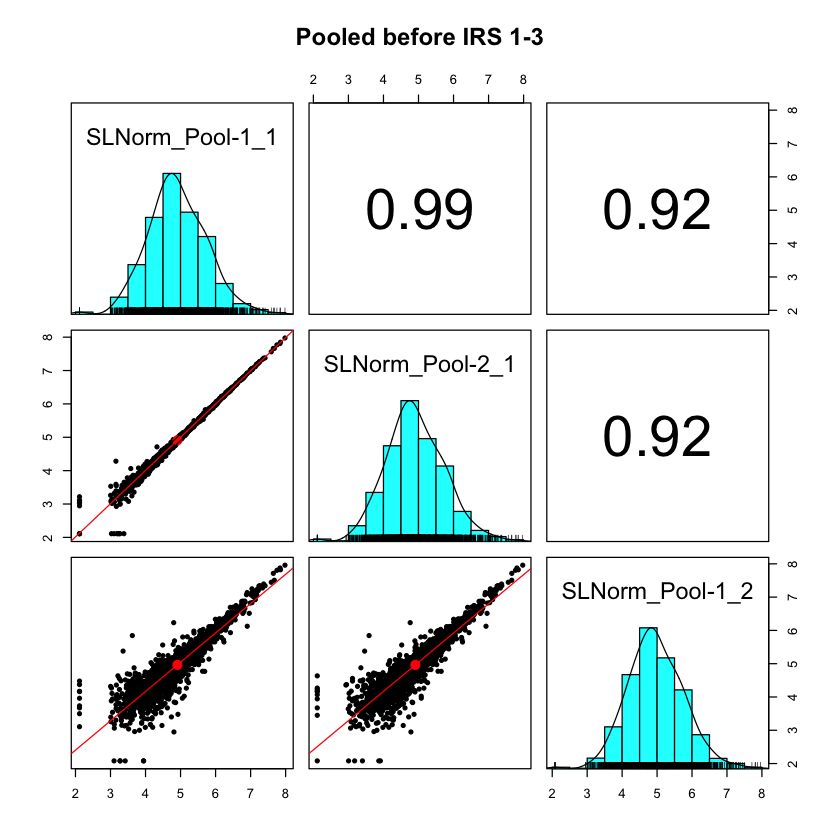

In [2]:
# sanity checks on the pooled standard channels
# before IRS for two and one from the first 2 TMT exps, and 1 and 2 from last 2
pairs.panels(log10(data_sl_pool[1:3]), lm = TRUE, main = "Pooled before IRS 1-3")

### The upper left plot (above) is within one TMT experiment, others are between TMTs

<br>

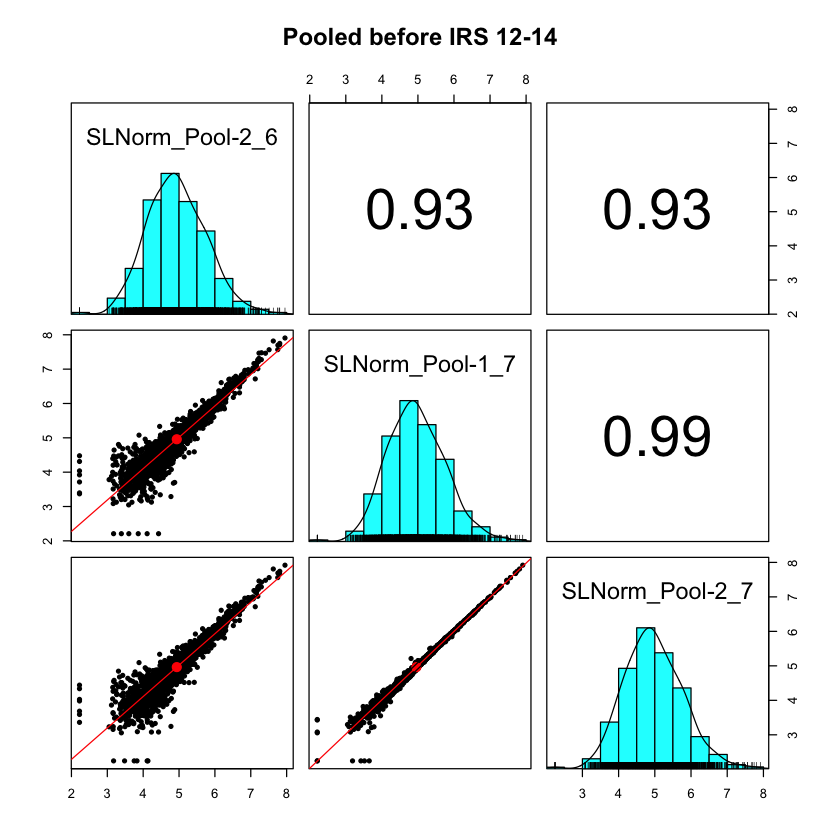

In [3]:
pairs.panels(log10(data_sl_pool[12:14]), lm = TRUE, main = "Pooled before IRS 12-14")

### Lower right plot (above) is within one TMT, other plots are between TMTs

<br>

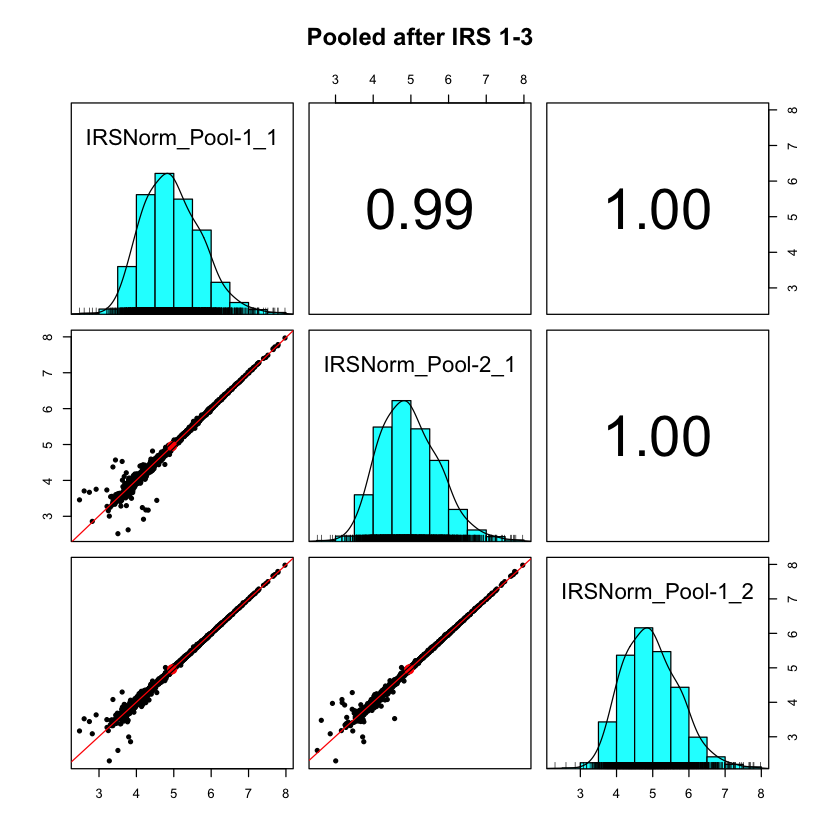

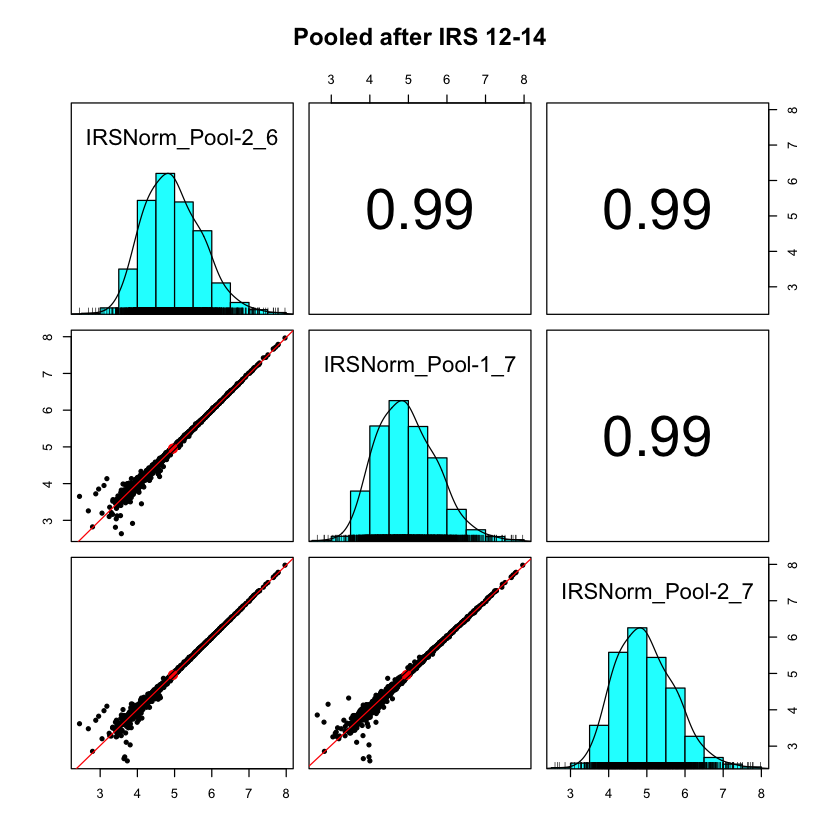

In [4]:
# after IRS for one and two from the last 2 TMT exps, and 1 and 2 from last 2
pairs.panels(log10(data_irs_pool[1:3]), lm = TRUE, main = "Pooled after IRS 1-3")
pairs.panels(log10(data_irs_pool[12:14]), lm = TRUE, main = "Pooled after IRS 12-14")

### After IRS, within and between TMT experiments are very similar

<br>

## The triplicate pooled channels are the best validation test

### Benchmark against the 3 pooled channels WITHIN single TMT experiments:

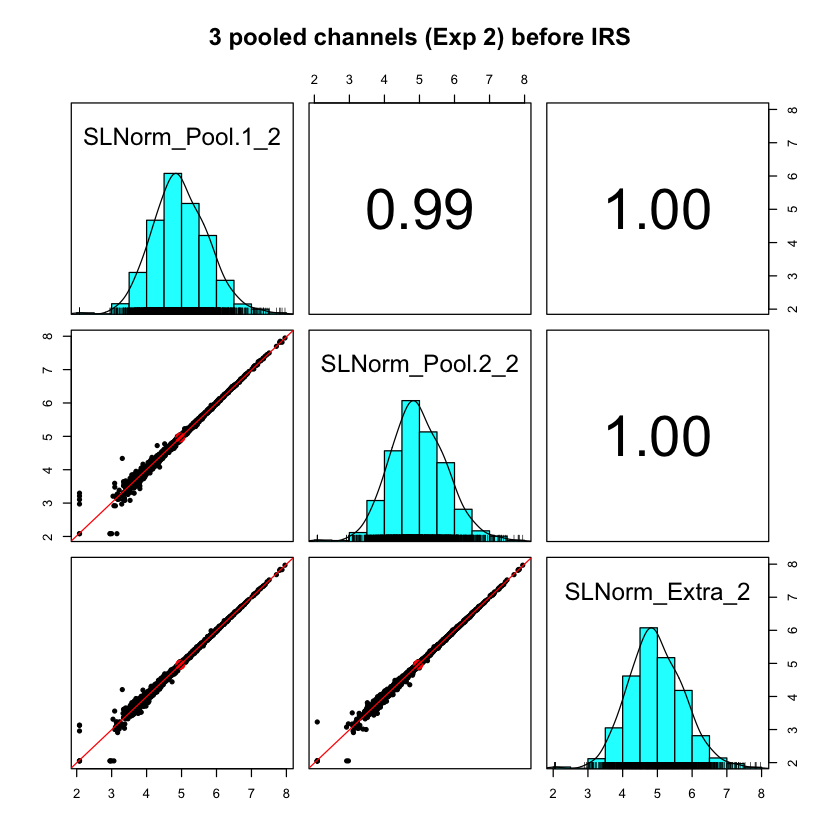

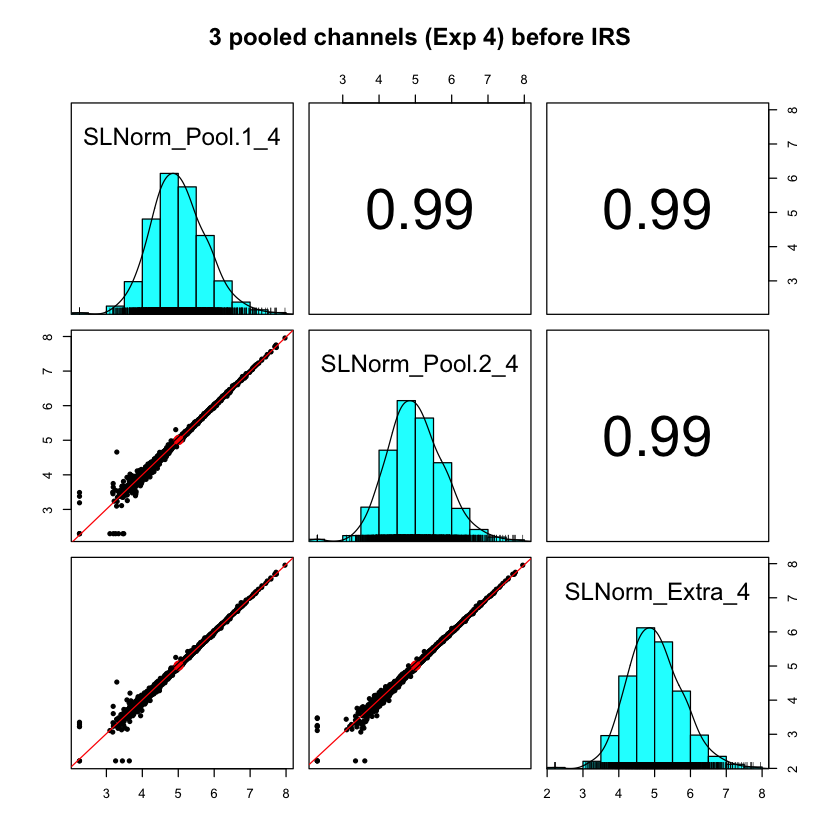

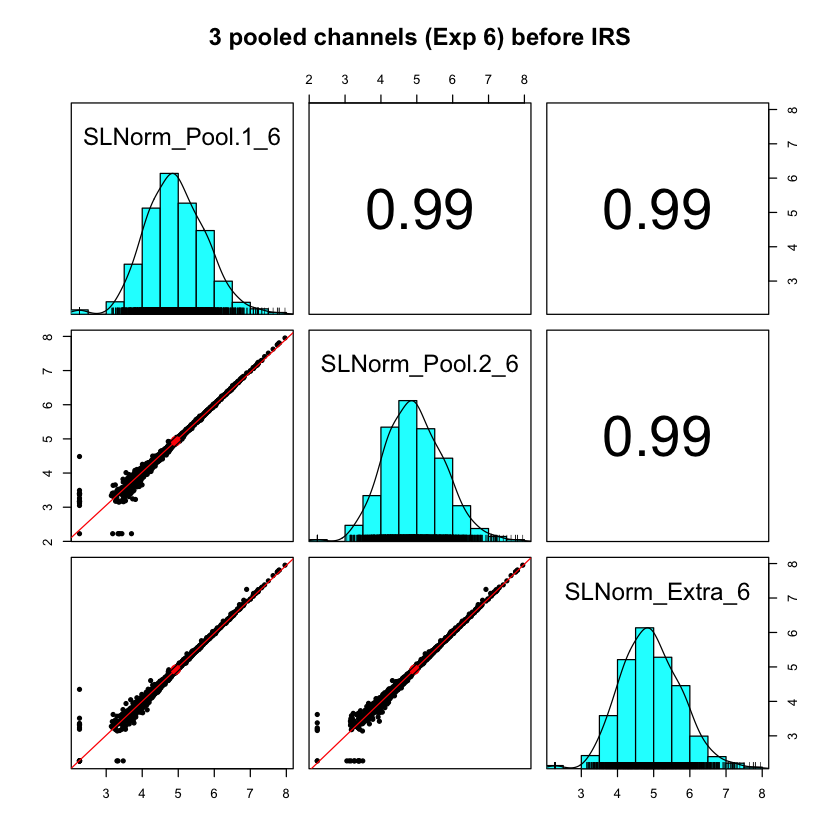

In [5]:
# validation of IRS - Extra channels are technical replicates of pooled channels
# experiments 2, 4, and 6 have 3 pooled channels each
# these are 3 within TMT pools, before and after IRS
pairs.panels(log10(data.frame(data_sl_pool[3:4], data_sl_extra[1])), lm = TRUE, 
             main = "3 pooled channels (Exp 2) before IRS")
pairs.panels(log10(data.frame(data_sl_pool[7:8], data_sl_extra[2])), lm = TRUE, 
             main = "3 pooled channels (Exp 4) before IRS")
pairs.panels(log10(data.frame(data_sl_pool[11:12], data_sl_extra[3])), lm = TRUE, 
             main = "3 pooled channels (Exp 6) before IRS")

### Technical replicates within one TMT experiment (above plots) are highly similar

### Look at the same channels after IRS adjustment:

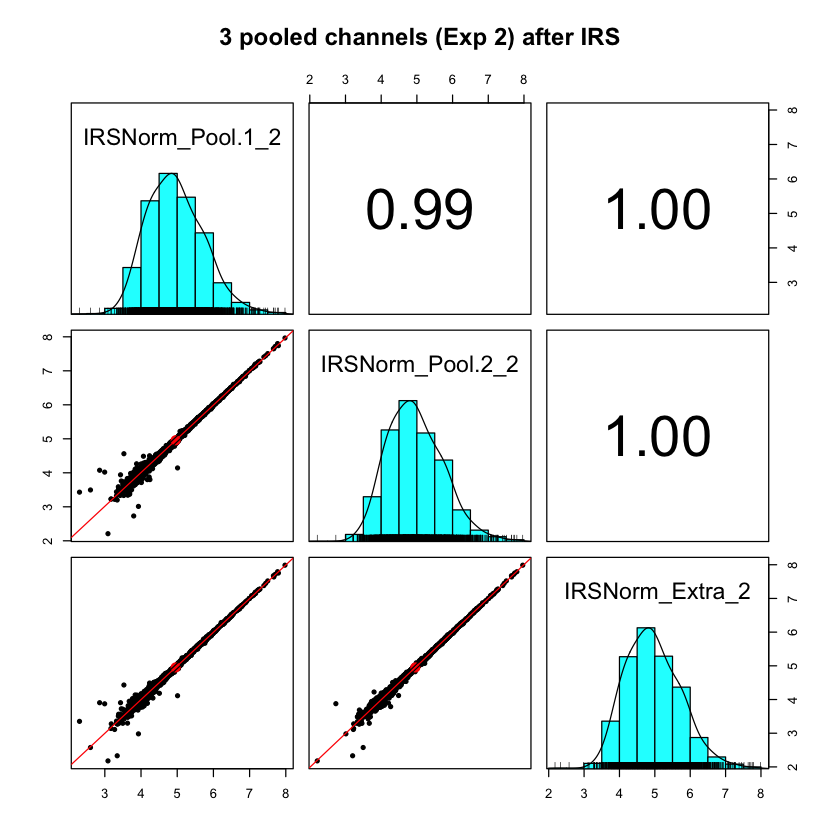

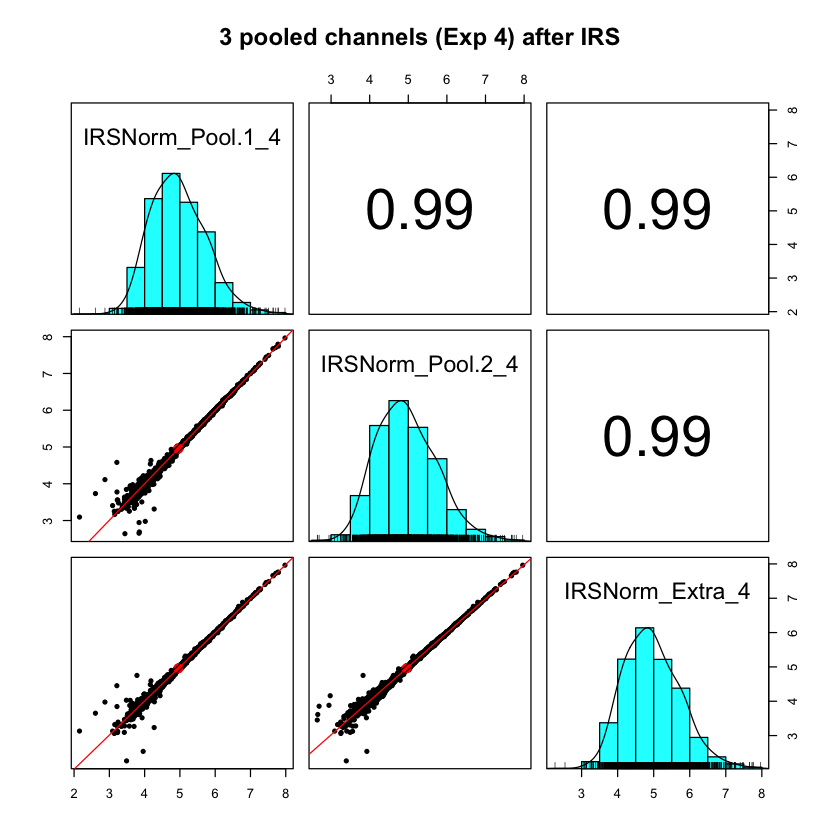

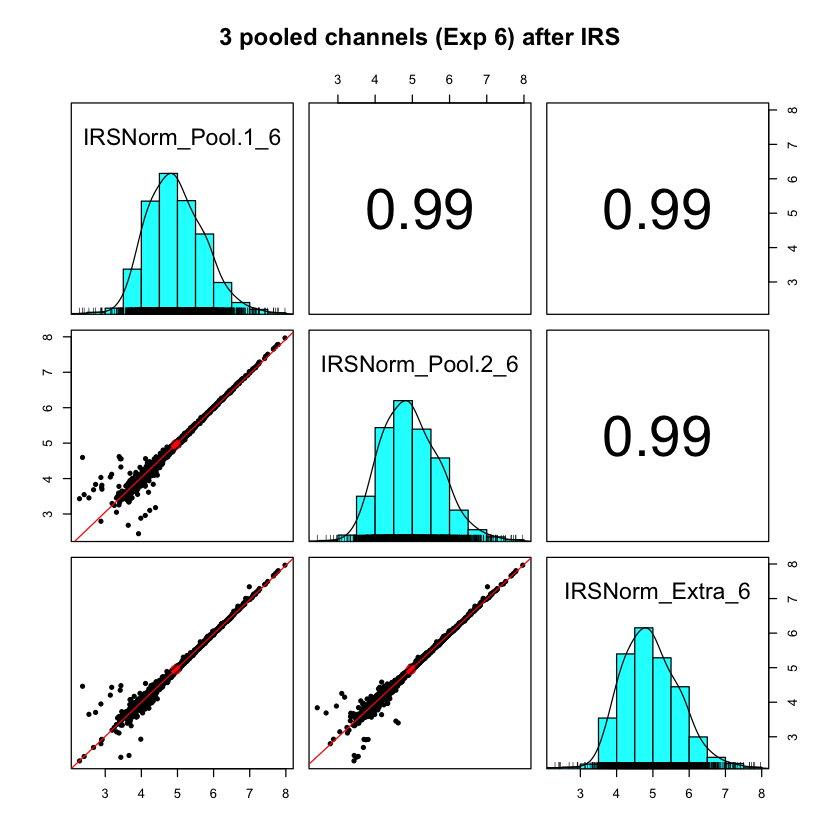

In [6]:
pairs.panels(log10(data.frame(data_irs_pool[3:4], data_irs_extra[1])), lm = TRUE, 
             main = "3 pooled channels (Exp 2) after IRS")
pairs.panels(log10(data.frame(data_irs_pool[7:8], data_irs_extra[2])), lm = TRUE, 
             main = "3 pooled channels (Exp 4) after IRS")
pairs.panels(log10(data.frame(data_irs_pool[11:12], data_irs_extra[3])), lm = TRUE, 
             main = "3 pooled channels (Exp 6) after IRS")

### IRS does not change relative channel intensities within a single TMT experiment
There are some differences for low abundance proteins, mostly due to missing data points. The points along the axes in the before IRS plots get different small values after IRS. After reporter ion rollup to the protein level, proteins having a sufficient average reporter ion signal over the 11-channels are retained. Any individual reporter ion intensities for the retained proteins that are zero (missing) are replaced with a low value (150 was used) that is about half of the smallest observed intensities.

## Test the 3 extra pooled channels in different TMTs

### Check scatter plots before IRS adjustment has been done:

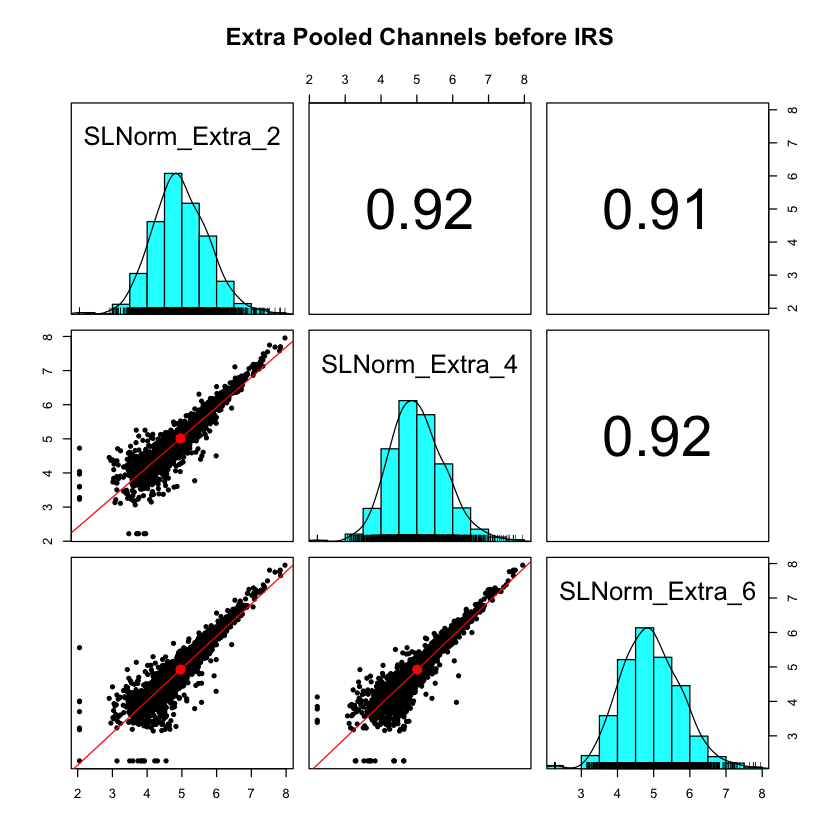

In [7]:
# before and after IRS for the 3 extra pooled channels (in different TMT exps)
pairs.panels(log10(data_sl_extra), lm = TRUE, main = "Extra Pooled Channels before IRS")

#### The data (above) are not too well correlated and there are many points off of the diagonal

### And after IRS:

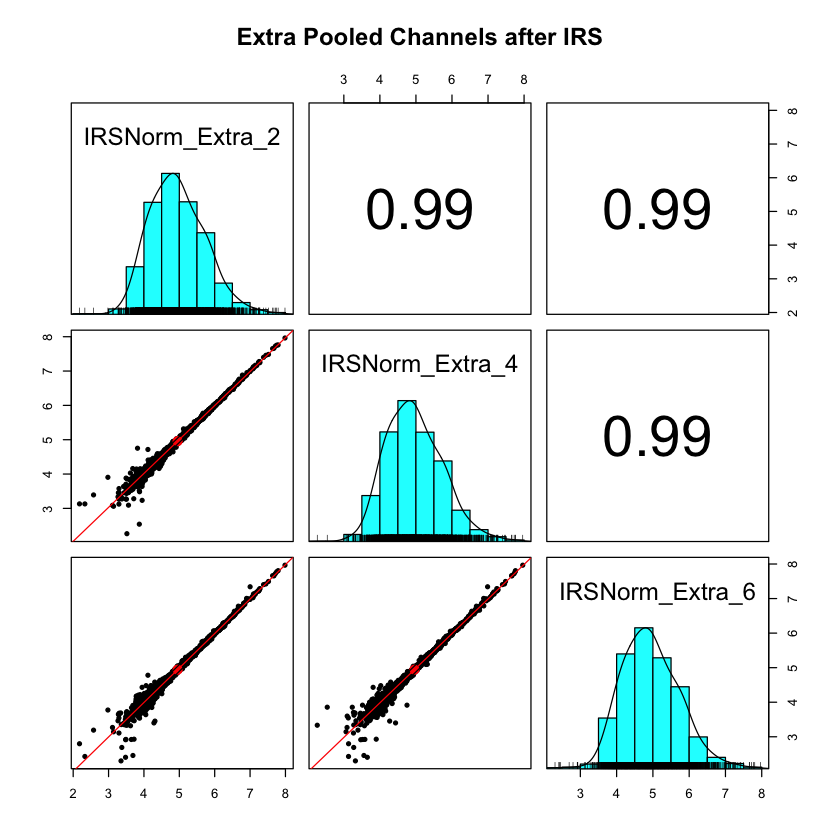

In [8]:
pairs.panels(log10(data_irs_extra), lm = TRUE, main = "Extra Pooled Channels after IRS")

## The extra pooled channels look like within TMT replicates after IRS

#### The data after IRS are highly correlated, tight to the diagonal with some exceptions at low abundances and have a very similar appearance to within single TMT technical replicates.

## Quantify the spread in the data around the diagonal trend lines
The scatter plots have a typical trend where data at lower abundances have greater variance. We will trim off some of the highest abundance and lowest abundance proteins, then compute the log2 of the intensity ratios. The average and standard deviation of the ratios will give us an indication of what sort of fold-change (FC) might be statistically significant.

We can take pairs of pooled standard channels within each TMT (7 pairs) and average the FC values (print average and SD). We can also take 7 pairs between TMT experiments, before and after IRS, to compare to.

In [9]:
# Makes vector of ratios, trims top and bottom 10%, returns 95% +/- FC value
trim_FC <- function(x, y) {
  x <- unlist(x)
  y <- unlist(y)  
  r = log2(x/y)
  s = x+y  
  df <- data.frame(X = x, Y = y, R = r, S = s)
  df <- arrange(df, S)
  rt = Trim(r, 0.1)
  rt.mean <- mean(rt)
  rt.sd <- sd(rt)
  return(2**(rt.mean + 1.96*rt.sd))
}

# ratios of two WITHIN TMT pooled standards
fc1 <- trim_FC(data_sl_pool[1], data_sl_pool[2])
fc2 <- trim_FC(data_sl_pool[3], data_sl_pool[4])
fc3 <- trim_FC(data_sl_pool[5], data_sl_pool[6])
fc4 <- trim_FC(data_sl_pool[7], data_sl_pool[8])
fc5 <- trim_FC(data_sl_pool[9], data_sl_pool[10])
fc6 <- trim_FC(data_sl_pool[11], data_sl_pool[12])
fc7 <- trim_FC(data_sl_pool[13], data_sl_pool[14])
print("paired within TMT, before IRS normed")
sl_before <- c(fc1, fc2, fc3, fc4, fc5, fc6, fc7)
round(c(mean(sl_before), sd(sl_before)),2)

# ratios of 7 pairs BETWEEN TMTs before IRS
fc1 <- trim_FC(data_sl_pool[1], data_sl_pool[3])
fc2 <- trim_FC(data_sl_pool[2], data_sl_pool[4])
fc3 <- trim_FC(data_sl_pool[5], data_sl_pool[7])
fc4 <- trim_FC(data_sl_pool[6], data_sl_pool[8])
fc5 <- trim_FC(data_sl_pool[9], data_sl_pool[11])
fc6 <- trim_FC(data_sl_pool[10], data_sl_pool[12])
fc7 <- trim_FC(data_sl_pool[13], data_sl_pool[1])
print("paired between TMT, before IRS normed")
sl_after <- c(fc1, fc2, fc3, fc4, fc5, fc6, fc7)
round(c(mean(sl_after), sd(sl_after)),2)

# ratios of another 7 pairs between TMTs after IRS
fc1 <- trim_FC(data_irs_pool[1], data_irs_pool[4])
fc2 <- trim_FC(data_irs_pool[2], data_irs_pool[3])
fc3 <- trim_FC(data_irs_pool[5], data_irs_pool[8])
fc4 <- trim_FC(data_irs_pool[6], data_irs_pool[7])
fc5 <- trim_FC(data_irs_pool[9], data_irs_pool[12])
fc6 <- trim_FC(data_irs_pool[10], data_irs_pool[11])
fc7 <- trim_FC(data_irs_pool[13], data_irs_pool[2])
print("paired between TMT, after IRS norm")
irs <- c(fc1, fc2, fc3, fc4, fc5, fc6, fc7)
round(c(mean(irs), sd(irs)),2)

[1] "paired within TMT, before IRS normed"


[1] 1.11 0.01

[1] "paired between TMT, before IRS normed"


[1] 1.84 0.22

[1] "paired between TMT, after IRS norm"


[1] 1.08 0.01

### Numbers confirm what the scatter plots indicate
Between TMT channels of the pooled standards would need fold changes of 2-fold to begin to be differential expression candidates. Within TMT channels or channels between TMTs after IRS are similar to each other and the distributions of ratios are much tighter.

## We can also compute some protein coefficient of variance distributions
We can do that within single TMT experiments for the three experiments where there are three pooled standards each. We can also do that for the three extra pooled channels before IRS and after IRS.

[1] "3-pool replicates in Exps 2, 4, and 6: median CVs (%)"


exp2 exp4 exp6 
4.11 4.45 4.84

[1] "Extra pooled cahnnels CVs (%) before and after IRS"


Before  After 
 28.69   5.50

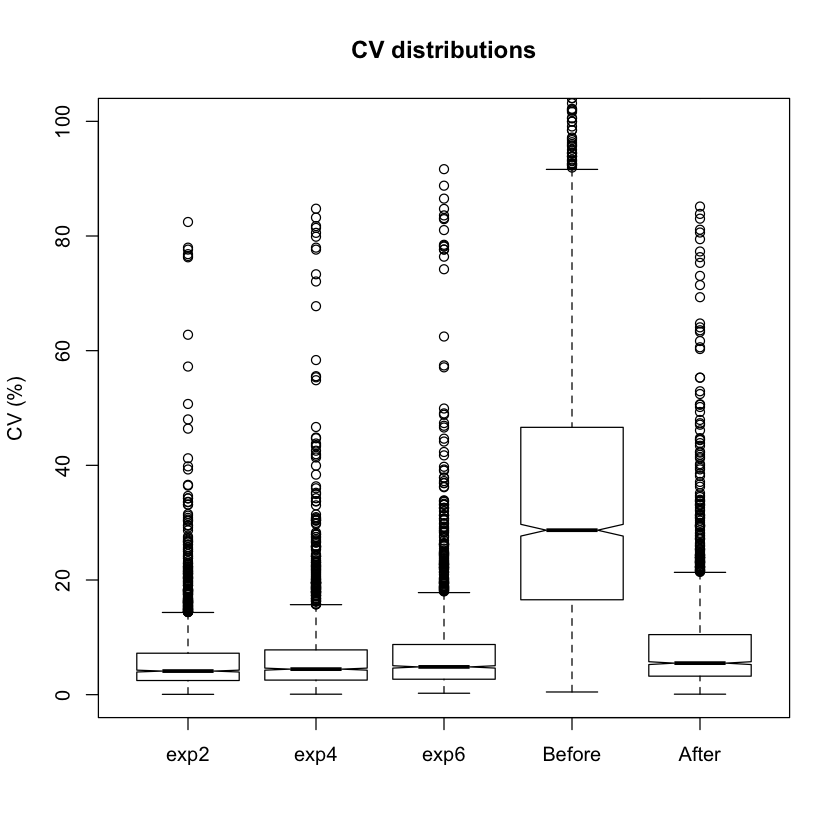

In [10]:
# create a row CV computing function for whole data frames
# input: data frame, output: vector of CVs (%)
CV <- function(df) {
  ave <- rowMeans(df)
  sd <- apply(df, 1, sd)
  cv <- 100 * sd / ave
}

# before IRS
exp2 <- data.frame(data_sl_pool[3:4], data_sl_extra[1])
exp4 <- data.frame(data_sl_pool[7:8], data_sl_extra[2])
exp6 <- data.frame(data_sl_pool[11:12], data_sl_extra[3])
replicates <- data.frame(exp2 = CV(exp2), exp4 = CV(exp4), exp6 = CV(exp6))
print("3-pool replicates in Exps 2, 4, and 6: median CVs (%)")
medians <- apply(replicates, 2, FUN = median)
round(medians, 2)

# extra CV
extras <- data.frame(Before = CV(data_sl_extra), After = CV(data_irs_extra))
print("Extra pooled cahnnels CVs (%) before and after IRS")
medians <- apply(extras, 2, FUN = median)
round(medians, 2)

# put CVs in a data frame to simplify plots and summaries
temp <- data.frame(replicates, extras)
boxplot(temp, notch = TRUE, main = "CV distributions", ylim = c(0, 100), ylab = "CV (%)")

## Conclusions
We were able to see how similar technical replicates are within single TMT experiments and between TMT experiments. Within TMT replicates are highly similar to each other having highly correlated and very narrow scatter plots. They also have median protein CVs of 4.5% for this data. Between TMT technical replicate channels, with conventional normalizations, have much wider scatter plots and a median CV of almost 29%. IRS effectively removes between TMT differences while preserving the typical within TMT data characteristics. Median CVs for the three extra channels after IRS were 5.5%, comparable to within TMT values. The 5.5% CV, a little higher than the 4.5% obtained within single TMT measurements, indicates that the IRS method does not over-correct data for this single case.  

In [11]:
# log session
sessionInfo()

R version 3.5.0 (2018-04-23)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS High Sierra 10.13.6

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] bindrcpp_0.2.2    psych_1.8.4       DescTools_0.99.25 forcats_0.3.0    
 [5] stringr_1.3.1     dplyr_0.7.6       purrr_0.2.5       readr_1.1.1      
 [9] tidyr_0.8.1       tibble_1.4.2      ggplot2_3.0.0     tidyverse_1.2.1  

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-3         tidyselect_0.2.4     repr_0.15.0         
 [4] haven_1.1.2          lattice_0.20-35      expm_0.999-2        
 [7] colorspace_1.3-2     htmltools_0.3.6      base64enc_0.1-3     
[10] rlang_0.2